In [9]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 对于感知机的实现，首先，需要知道算法本身的原理和流程。
# 首先假设输入为(x1,y1),...,(xn,yn)
# 选定的分类模型为f(x)=sign(wx+b)
# sign(x):当x >= 0时，sign(x)=1。当x < 1时，sign(x)=-1
# 利用提供的训练数据对该模型进行训练，最终得到合适的w，b

# 具体的训练步骤:
# (1)选定w，b的初值，在这里可以随意设置，令w=0向量，b=0
# (2)在训练集中随机的选取一个点(xi，yi)
# (3)如果yi*(w*xi + b) <= 0 此时需要更新w，b(这里的xi不要用函数的思维理解为就是x，例如y = 1-x这条直线将所有的数据点分为两部分，则此时的
# xi=(x，y)，而yi是我们人为的附加分类结果不能与模型中的y混淆)(为什么<=0就要更新参数呢?分析来看仍以y=1-x来举例，假定此时的分割线为y=1-x，
# 所以此时的w=(1，1)，b=-1。将数据分为两部分在直线上方的为正类yi=1，在直线下方的为负类yi=-1。所以此时来考虑，yi*(w*xi+b)当正类分类正确
# 则yi=1，w*xi+b>0，所以上式>0;当负类分类正确，yi=-1，w*xi+b<0;所以上式>0。但当负类被分为正类，yi=-1，w*xi+b>0，所以上式<0;当正类被
# 分为负类，yi=1，w*x+b < 0，所以上式<0;至于等于0，则说明点在直线上。)
# w与b的更新采用梯度下降的方法:
# 谈到梯度下降就要说到损失函数的问题:损失函数:minL(w，b) = - sum(yi*(w*xi + b))
# 随机选取一个误分类点，对w，b更新，w = w - (-xi*yi)*a   b = b - (-yi*a)
# (4)再重复第三步，直到所有的yi*(w*xi+b)>0。


In [11]:
class TrainDataLoader:
    def __init__(self):
        pass
    
    def GenerateRandomData(self,count,gradient):
        x1 = np.linspace(1,5,count)
        x2 = gradient*x1 + np.random.randint(-10,10,*x1.shape)
        t1 = np.linspace(10,15,count)
        t2 = gradient*t1 + np.random.randint(-10,10,*t1.shape)
        
        dataset = []
        y = []
        for i in range(*x1.shape):
            dataset.append([x1[i],x2[i]])
            y.append(-1)
        for i in range(*t1.shape):
            dataset.append([t1[i],t2[i]])
            y.append(1)
            
        return np.mat(y),np.mat(dataset)

In [84]:
train_data = TrainDataLoader()
result,train_data = train_data.GenerateRandomData(10,2)

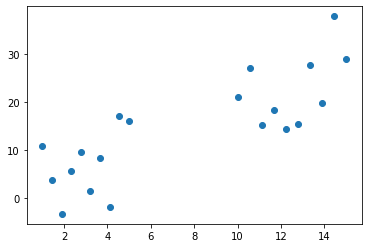

In [85]:
plt.scatter(np.array(train_data)[:,0],np.array(train_data)[:,1])

In [6]:
len(train_data.T)

2

In [86]:
class Perceptron_hand:
    def __init__(self,train_data=[],real_result=[],learn_rate=1):
        self.w = np.zeros([1,len(train_data.T)],int)
        self.b = 0
        self.learn_rate = learn_rate
        self.train_data = train_data
        self.real_result = real_result
    #选取随机的点
    def get_random_point(self):
        i = 0
        while True:
            index = np.random.randint(0,len(self.train_data))
            yi = np.array(self.real_result)[0][index]
            if yi*(np.dot(self.train_data[index],self.w.T)+self.b) <= 0:
                i += 0
                break
            else:
                if i == len(self.train_data.T):
                    break;
        return self.train_data[index],yi
    #利用模型判断随机点
    def update(self,point,yi):
        self.w = self.w + self.learn_rate * point * yi 
        self.b = self.b + self.learn_rate * yi
    
    #重复以上的步骤
    def fit(self,times):
        for i in range(times):
            point,yi = self.get_random_point()
            self.update(point,yi)
        return np.array(self.w),np.array(self.b)
        
            

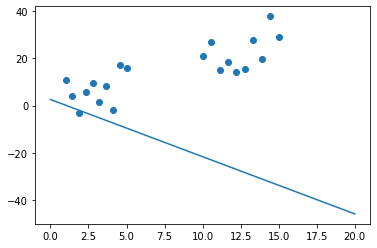

In [117]:
p = Perceptron_hand(train_data,result)
w,b = p.fit(10)
plt.scatter(np.array(train_data)[:,0],np.array(train_data)[:,1])
x = np.linspace(0,20,50)
y = (-w[:,0]/w[:,1])*x - (b/w[:,1])
plt.plot(x,y.T)

In [ ]:
# gradient = 2
# offset   = 10
# point_num = 1000
# train_num = 50000
# loader = TrainDataLoader()
# x, y, result, train_data =  loader.GenerateRandomData(point_num, gradient, offset)
# x_t, y_t, test_real_result, test_data =  loader.GenerateRandomData(100, gradient, offset)

# # First training
# perceptron = Perceptron_hand(train_data, result)
# perceptron.train(train_num)
# perceptron.verify(test_data, test_real_result)
# print("T1: w:", perceptron.w," b:", perceptron.b)

# # Draw the figure
# # 1. draw the (x,y) points
# plt.plot(x, y, "*", color='gray')
# plt.plot(x_t, y_t, "+")
# # 2. draw y=gradient*x+offset line
# plt.plot(x,x.dot(gradient)+offset, color="red")
# # 3. draw the line w_1*x_1 + w_2*x_2 + b = 0
# plt.plot(x, -(x.dot(float(perceptron.w.T[0]))+float(perceptron.b))/float(perceptron.w.T[1])
#          , color='green')
# plt.show()
